## Exploratory of Trametinib 24hr expt3 files, preprocessing and clustering

Barcodes, classification, genes and matrix exploring based on <a href="https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html#Preprocessing-and-clustering-3k-PBMCs" target="_blank">Scanpy Preprocessing and clustering tutorial</a>.

Download <a href="https://ndownloader.figshare.com/files/18716372?private_link=139f64b495dea9d88c70" target="_blank">MIX-seq data</a>.

In [1]:
import pandas as pd
import scanpy as sc

In [2]:
barcodes = pd.read_csv('../data/Trametinib_24hr_expt3/barcodes.tsv', sep='\t', index_col=None, header=None)

In [3]:
barcodes

,0
0,AAACCTGAGAAGGACA-1
1,AAACCTGAGCTGATAA-1
2,AAACCTGAGTCCTCCT-1
3,AAACCTGAGTCGTTTG-1
4,AAACCTGCAAGGCTCC-1
...,...
12234,TTTGTCATCAACACGT-1
12235,TTTGTCATCAGCTTAG-1
12236,TTTGTCATCCGTTGTC-1
12237,TTTGTCATCCTAGGGC-1


In [4]:
classification = pd.read_csv('../data/Trametinib_24hr_expt3/classifications.csv', sep=',', index_col=0, header=0)

In [5]:
classification

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGAAGGACA-1,8505C_THYROID,331,0.761225,10.272481,0.429425,7.046029,0.947875,498,0.012601,8505C_THYROID,LMSU_STOMACH,4.279200,0.072328,normal,4.186003e-10,ACH-001307
AAACCTGAGCTGATAA-1,NCIH841_LUNG,439,0.673995,17.273836,0.457174,14.045892,0.678102,658,0.012873,NCIH841_LUNG,ACCMESO1_PLEURA,6.934175,0.095702,normal,6.185580e-09,ACH-000292
AAACCTGAGTCCTCCT-1,NCIH841_LUNG,623,0.657143,15.747396,0.459029,13.111132,0.291854,923,0.003446,NCIH841_LUNG,IGR1_SKIN,2.779831,0.126612,normal,3.473062e-16,ACH-000292
AAACCTGAGTCGTTTG-1,PC3_PROSTATE,338,0.703424,14.931238,0.528792,12.811721,0.107321,454,0.016150,PC3_PROSTATE,786O_KIDNEY,4.409031,0.078026,normal,4.040256e-08,ACH-000090
AAACCTGCAAGGCTCC-1,NCIH838_LUNG,714,0.828619,14.812576,0.560061,11.737216,0.772958,1266,0.002455,NCIH838_LUNG,LUDLU1_LUNG,3.588872,0.123028,normal,1.180194e-20,ACH-000416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAACACGT-1,MDAMB435S_SKIN,396,0.715774,16.543346,0.525182,14.143499,0.164135,612,0.010081,MDAMB435S_SKIN,SKUT1_SOFT_TISSUE,7.573964,0.082008,normal,7.736794e-11,ACH-000884
TTTGTCATCAGCTTAG-1,CAL62_THYROID,367,0.814275,11.148921,0.540588,8.975176,0.248254,645,0.006214,CAL62_THYROID,COV434_OVARY,3.747808,0.080201,normal,8.140466e-15,ACH-000174
TTTGTCATCCGTTGTC-1,SNU1041_UPPER_AERODIGESTIVE_TRACT,826,0.702375,13.402137,0.463129,10.629367,0.660317,1506,0.012682,SNU1041_UPPER_AERODIGESTIVE_TRACT,SNU245_BILIARY_TRACT,4.882797,0.138314,normal,2.153216e-09,ACH-000618


In [6]:
genes = pd.read_csv('../data/Trametinib_24hr_expt3/genes.tsv', sep='\t', header=None, index_col=0)

In [7]:
genes

,1
0,
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000215635,AC145205.1
ENSG00000268590,BAGE5
ENSG00000251180,CU459201.1


In [8]:
mtx = pd.read_csv('../data/Trametinib_24hr_expt3/matrix.mtx', sep=' ', header=1, index_col=None)

In [9]:
mtx

,32738,12239,40535503
0,43,1,1
1,44,1,1
2,54,1,1
3,62,1,1
4,68,1,5
...,...,...,...
40535498,32706,12239,26
40535499,32707,12239,4
40535500,32708,12239,1
40535501,32709,12239,21


In [10]:
adata = sc.read_10x_mtx('../data/Trametinib_24hr_expt3/')

In [11]:
adata

AnnData object with n_obs × n_vars = 12239 × 32738
    var: 'gene_ids'

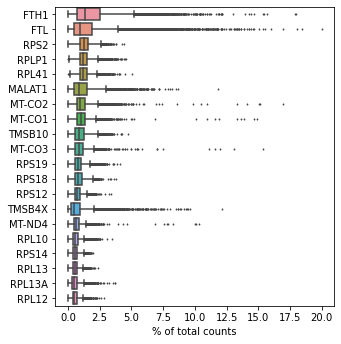

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20,)

## Creating dataframe

In [13]:
adata.strings_to_categoricals()

In [14]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGAAGGACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCTGATAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTCCTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTCGTTTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAAGGCTCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAACACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCAGCTTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCCGTTGTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCCTAGGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering, marking mitochondrial genes

Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes.

In [15]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


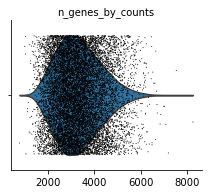

In [16]:
sc.pl.violin(adata, ['n_genes_by_counts', ],
             jitter=0.4, multi_panel=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


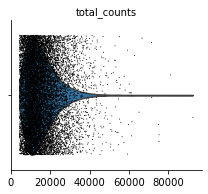

In [17]:
sc.pl.violin(adata, [ 'total_counts', ],
             jitter=0.4, multi_panel=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


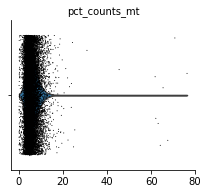

In [18]:
sc.pl.violin(adata, ['pct_counts_mt'],
             jitter=0.4, multi_panel=True)

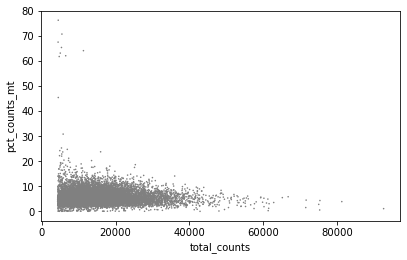

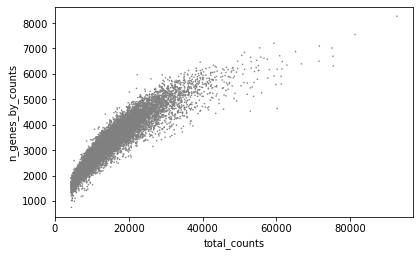

In [19]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Removing cells that contain too many total counts or mithocondrial genes expressed based on the graphs above.

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :] 
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing.

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [22]:
sc.pp.log1p(adata)

Identifying and filtering highly-variable genes.

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

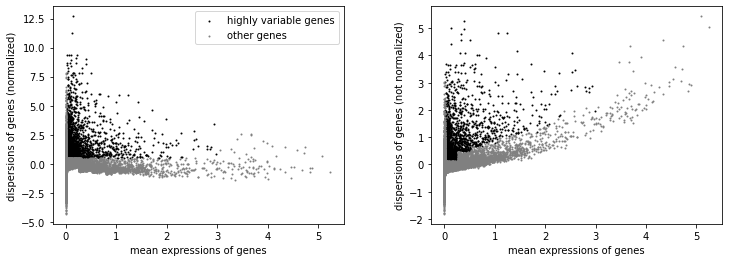

In [24]:
sc.pl.highly_variable_genes(adata)

In [25]:
adata.raw = adata

In [26]:
adata = adata[:, adata.var.highly_variable]  

Regressing out the influence of total counts per cell and the percentage of expressed mitochondrial genes. Scaling and cutting out data greater than standard deviation 10.

In [27]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

In [28]:
sc.pp.scale(adata, max_value=10)

## PCA

Running principal component analysis (PCA) to display the main axes of variation and reduce noise in data.

In [29]:
sc.tl.pca(adata, svd_solver='arpack') 

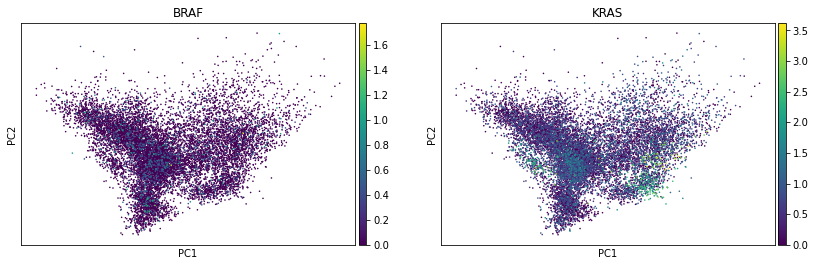

In [31]:
sc.pl.pca(adata, color=['BRAF',  'KRAS'])

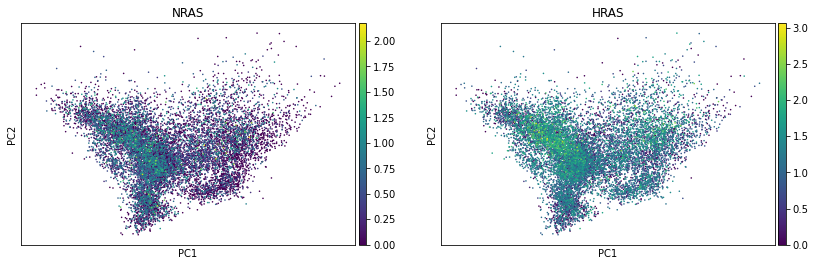

In [32]:
sc.pl.pca(adata, color=['NRAS', 'HRAS'])

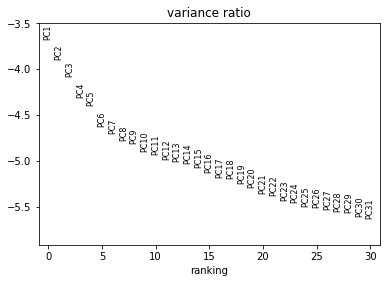

In [33]:
sc.pl.pca_variance_ratio(adata, log=True) 

In [34]:
print(sorted(list(adata.var_names)))

['7SK-2', 'A2M', 'AARD', 'ABCA1', 'ABCA7', 'ABCB5', 'ABCC3', 'ABCC4', 'ABHD12B', 'ABHD2', 'ABLIM1', 'AC002454.1', 'AC002456.2', 'AC003092.1', 'AC004540.4', 'AC006262.4', 'AC006262.5', 'AC006277.2', 'AC009410.1', 'AC017002.1', 'AC018799.1', 'AC018816.3', 'AC018890.6', 'AC023490.1', 'AC064834.1', 'AC073218.2', 'AC073236.3', 'AC074389.9', 'AC079466.1', 'AC098973.2', 'AC104135.3', 'AC104654.2', 'AC110619.2', 'AC145212.1', 'ACHE', 'ACP5', 'ACSL5', 'ACTA2', 'ACTC1', 'ACTG2', 'ADAM12', 'ADAM19', 'ADAMTS1', 'ADAMTS5', 'ADAMTS6', 'ADCY1', 'ADD3', 'ADIRF', 'ADM', 'ADRA2A', 'ADRB2', 'ADRM1', 'AEBP1', 'AFAP1-AS1', 'AFF3', 'AFMID', 'AFP', 'AGAP2-AS1', 'AGR2', 'AGR3', 'AGT', 'AHNAK2', 'AIF1L', 'AIFM3', 'AIM2', 'AK5', 'AKAP12', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'ALB', 'ALDH1A1', 'ALDH1A3', 'ALDH2', 'ALDH3A1', 'ALDH3A2', 'ALDH3B2', 'ALDH7A1', 'ALPK2', 'ALPP', 'ALX1', 'AMBP', 'AMIGO2', 'AMPH', 'ANG', 'ANGPT2', 'ANGPTL2', 'ANGPTL4', 'ANK1', 'ANK2', 'ANK3', 'ANKLE1', 'ANKRD1', 'ANKRD10',

Computing neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [36]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [37]:
sc.tl.umap(adata)

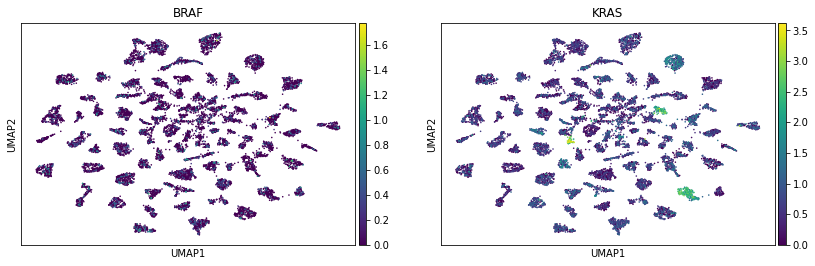

In [38]:
sc.pl.umap(adata, color=[ 'BRAF', 'KRAS' ]) 

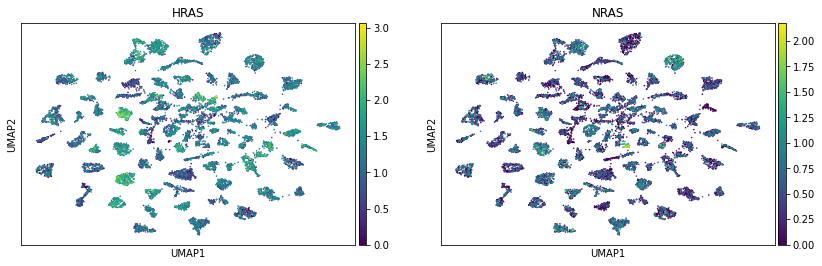

In [40]:
sc.pl.umap(adata, color=[  'HRAS', 'NRAS'])  

## Clustering the neighborhood graph

In [41]:
sc.tl.leiden(adata)

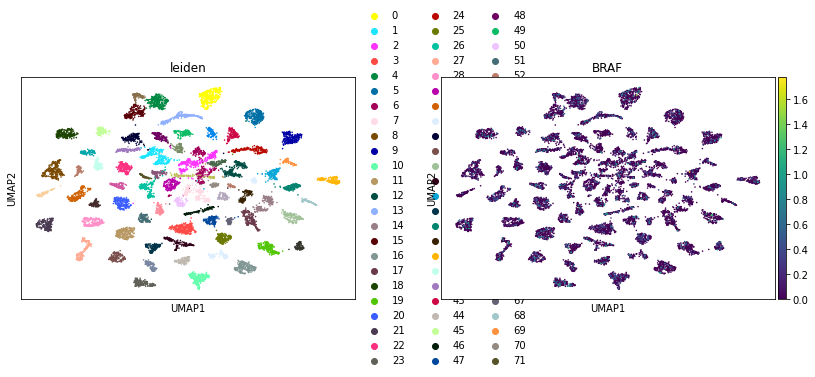

In [44]:
sc.pl.umap(adata, color=['leiden','BRAF' ])

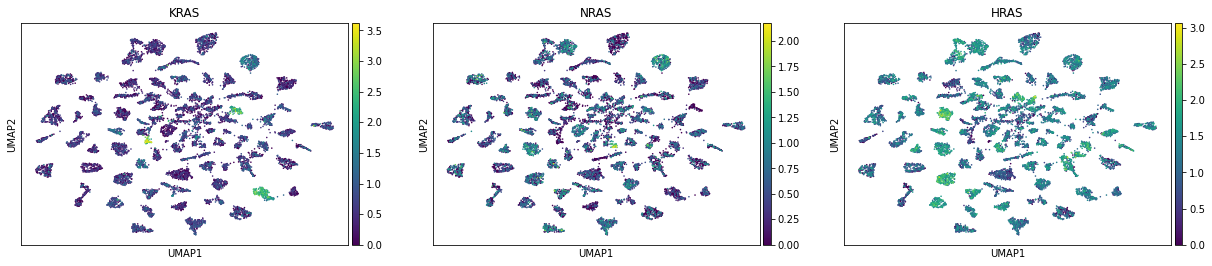

In [46]:
sc.pl.umap(adata, color=['KRAS','NRAS', 'HRAS'])

## Cell line annotation

Using **classification.csv** as metadata.

In [49]:
celllines = classification.singlet_ID.tolist()
test_celllist = list(set(celllines))
test_celllist.sort()
print(test_celllist)

['22RV1_PROSTATE', '42MGBA_CENTRAL_NERVOUS_SYSTEM', '769P_KIDNEY', '786O_KIDNEY', '8505C_THYROID', 'A2780_OVARY', 'A375_SKIN', 'ACCMESO1_PLEURA', 'AGS_STOMACH', 'BEN_LUNG', 'CAL120_BREAST', 'CAL62_THYROID', 'CAOV3_OVARY', 'CJM_SKIN', 'COLO668_LUNG', 'COLO680N_OESOPHAGUS', 'COV434_OVARY', 'DMS273_LUNG', 'DV90_LUNG', 'EFM192A_BREAST', 'G401_SOFT_TISSUE', 'GCIY_STOMACH', 'GP2D_LARGE_INTESTINE', 'HCC1143_BREAST', 'HCC1195_LUNG', 'HCC1419_BREAST', 'HEC1B_ENDOMETRIUM', 'HEP3B217_LIVER', 'HS766T_PANCREAS', 'HS852T_SKIN', 'HUCCT1_BILIARY_TRACT', 'IGR1_SKIN', 'IGROV1_OVARY', 'ISTMES1_PLEURA', 'J82_URINARY_TRACT', 'JHH5_LIVER', 'JHOM1_OVARY', 'KNS42_CENTRAL_NERVOUS_SYSTEM', 'KNS60_CENTRAL_NERVOUS_SYSTEM', 'KNS81_CENTRAL_NERVOUS_SYSTEM', 'KYSE270_OESOPHAGUS', 'LI7_LIVER', 'LK2_LUNG', 'LMSU_STOMACH', 'LN229_CENTRAL_NERVOUS_SYSTEM', 'LNCAPCLONEFGC_PROSTATE', 'LOVO_LARGE_INTESTINE', 'LUDLU1_LUNG', 'MALME3M_SKIN', 'MDAMB435S_SKIN', 'MDAMB468_BREAST', 'MIAPACA2_PANCREAS', 'MSTO211H_PLEURA', 'NCIH1048_

In [50]:
meta = classification

In [51]:
meta.head()

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGAAGGACA-1,8505C_THYROID,331,0.761225,10.272481,0.429425,7.046029,0.947875,498,0.012601,8505C_THYROID,LMSU_STOMACH,4.279200,0.072328,normal,4.186003e-10,ACH-001307
AAACCTGAGCTGATAA-1,NCIH841_LUNG,439,0.673995,17.273836,0.457174,14.045892,0.678102,658,0.012873,NCIH841_LUNG,ACCMESO1_PLEURA,6.934175,0.095702,normal,6.185580e-09,ACH-000292
AAACCTGAGTCCTCCT-1,NCIH841_LUNG,623,0.657143,15.747396,0.459029,13.111132,0.291854,923,0.003446,NCIH841_LUNG,IGR1_SKIN,2.779831,0.126612,normal,3.473062e-16,ACH-000292
AAACCTGAGTCGTTTG-1,PC3_PROSTATE,338,0.703424,14.931238,0.528792,12.811721,0.107321,454,0.016150,PC3_PROSTATE,786O_KIDNEY,4.409031,0.078026,normal,4.040256e-08,ACH-000090
AAACCTGCAAGGCTCC-1,NCIH838_LUNG,714,0.828619,14.812576,0.560061,11.737216,0.772958,1266,0.002455,NCIH838_LUNG,LUDLU1_LUNG,3.588872,0.123028,normal,1.180194e-20,ACH-000416


In [52]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGAAGGACA-1,2368,8563.0,366.0,4.274203,6
AAACCTGAGCTGATAA-1,3127,11098.0,769.0,6.929176,23
AAACCTGAGTCCTCCT-1,4136,17611.0,489.0,2.776674,23
AAACCTGAGTCGTTTG-1,2551,7537.0,332.0,4.404936,44
AAACCTGCAAGGCTCC-1,4019,18849.0,676.0,3.586397,5


In [53]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [54]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Cell type
AAACCTGAGAAGGACA-1,2368,8563.0,366.0,4.274203,6,8505C_THYROID
AAACCTGAGCTGATAA-1,3127,11098.0,769.0,6.929176,23,NCIH841_LUNG
AAACCTGAGTCCTCCT-1,4136,17611.0,489.0,2.776674,23,NCIH841_LUNG
AAACCTGAGTCGTTTG-1,2551,7537.0,332.0,4.404936,44,PC3_PROSTATE
AAACCTGCAAGGCTCC-1,4019,18849.0,676.0,3.586397,5,NCIH838_LUNG


In [55]:
f = lambda x: x.split('_', 1  ) [1]
adata.obs['Tissue type'] = adata.obs['Cell type'].apply( f )

... storing 'Cell type' as categorical
... storing 'Tissue type' as categorical


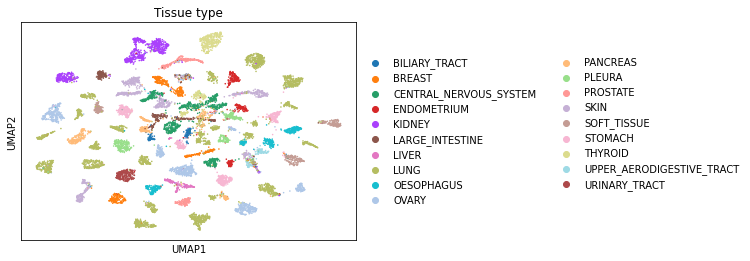

In [56]:
sc.pl.umap(adata, color='Tissue type')

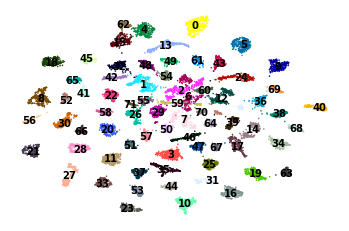

In [57]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [58]:
list(adata.obs['Tissue type'].unique())

['THYROID',
 'LUNG',
 'PROSTATE',
 'BREAST',
 'URINARY_TRACT',
 'CENTRAL_NERVOUS_SYSTEM',
 'PANCREAS',
 'KIDNEY',
 'SKIN',
 'LARGE_INTESTINE',
 'STOMACH',
 'OVARY',
 'BILIARY_TRACT',
 'PLEURA',
 'ENDOMETRIUM',
 'OESOPHAGUS',
 'SOFT_TISSUE',
 'UPPER_AERODIGESTIVE_TRACT',
 'LIVER']